Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,401 (25.00 KB)

 Trainable params: 6,401 (25.00 KB)

 Non-trainable params: 0 (0.00 B)


開始訓練模型...
Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1417 - val_loss: 0.0627
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0394 - val_loss: 0.0046
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032 - val_loss: 9.7405e-04
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.6428e-04 - val_loss: 2.9254e-04
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.5970e-04 - val_loss: 2.0106e-04
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5431e-04 - val_loss: 2.0293e-04
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7185e-04 - val_loss: 1.0206e-04
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1858e-04 - val_loss: 7.3558e-05
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.9011e-05 - val_loss: 5.3132e-05
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.2884e-05 - val_loss: 4.7

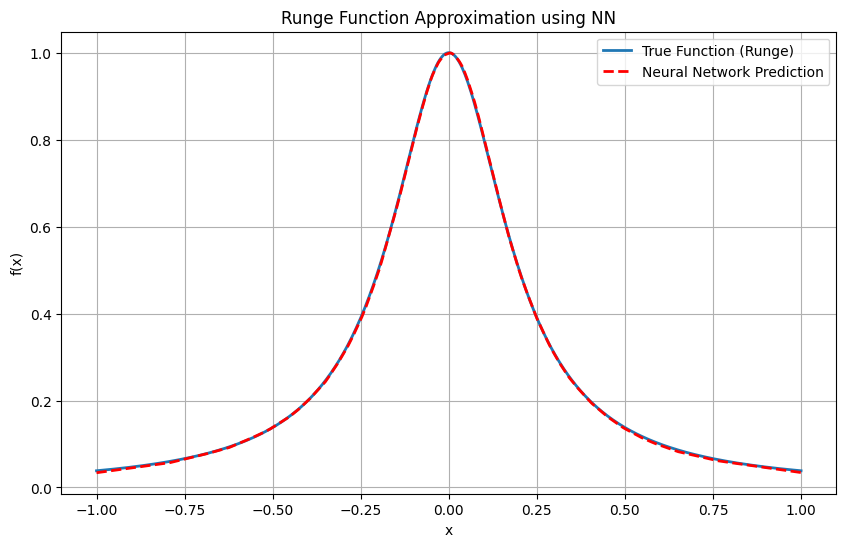

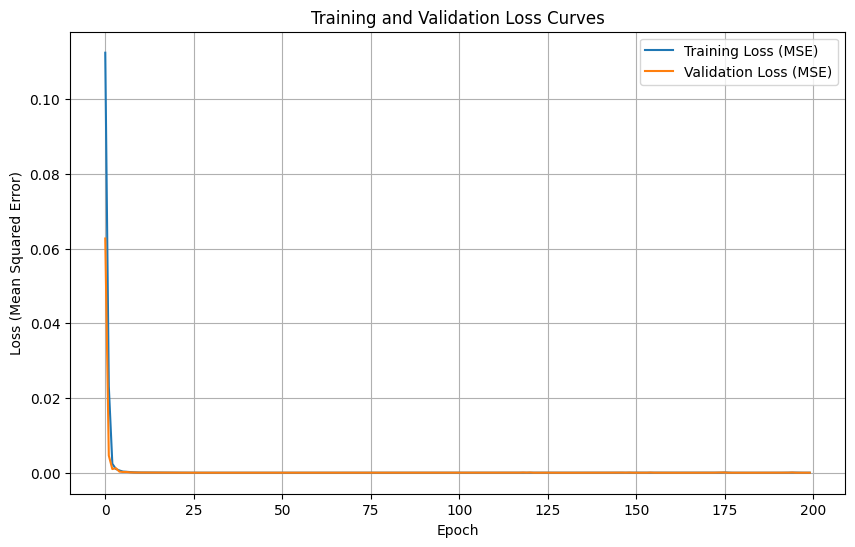


--- 錯誤報告 ---
最終模型在測試集上的 Mean Squared Error (MSE): 0.00000474
最終模型在測試集上的 Maximum Error: 0.00476157


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


def runge_function(x):
    return 1 / (1 + 25 * x**2)

N_train = 1000
X_train = np.random.uniform(-1, 1, N_train).reshape(-1, 1)
y_train = runge_function(X_train)

N_val = 200
X_val = np.random.uniform(-1, 1, N_val).reshape(-1, 1)
y_val = runge_function(X_val)

X_test = np.linspace(-1, 1, 500).reshape(-1, 1)
y_test_true = runge_function(X_test)

model = keras.Sequential()


model.add(layers.Dense(64, activation='relu', input_shape=(1,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(1, activation='linear'))

model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')


print("\n開始訓練模型...")

history = model.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1 # 設置為 1 以顯示訓練過程
)
print("模型訓練完成！")

y_pred_nn = model.predict(X_test)

# 繪製真實函數與 NN 預測的比較圖
plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test_true, label='True Function (Runge)', linewidth=2)
plt.plot(X_test, y_pred_nn, label='Neural Network Prediction', linestyle='--', linewidth=2, color='red')
plt.title('Runge Function Approximation using NN')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# 繪製訓練/驗證損失曲線
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Training and Validation Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)
plt.show()

# MSE 與 Max Error
test_mse = model.evaluate(X_test, y_test_true, verbose=0)
print("\n--- 錯誤報告 ---")
print(f"最終模型在測試集上的 Mean Squared Error (MSE): {test_mse:.8f}")

max_error = np.max(np.abs(y_test_true - y_pred_nn))
print(f"最終模型在測試集上的 Maximum Error: {max_error:.8f}")